In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from glob import glob
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!pip install rasterio
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import rasterio
from rasterio.transform import from_origin

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [96]:
!tar -xvf  '/content/drive/MyDrive/Dissertation - Nowcasting/Dissertation Project/Data/NWCSAF_Yifan/20191128.tar' -C '/content/drive/MyDrive/Dissertation - Nowcasting/Dissertation Project/Data/Sample'

./20191128/NWCSAF_regridded_PanAfrica_20191128T0000.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0015.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0030.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0045.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0100.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0115.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0130.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0145.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0200.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0215.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0230.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0245.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0300.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0315.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0330.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0345.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0400.npy
./20191128/NWCSAF_regridded_PanAfrica_20191128T0

In [3]:
data_=glob("/content/drive/MyDrive/Dissertation - Nowcasting/Dissertation Project/Data/Sample/20191127/*.npy")
data_[12]

'/content/drive/MyDrive/Dissertation - Nowcasting/Dissertation Project/Data/Sample/20191127/NWCSAF_regridded_PanAfrica_20191127T0300.npy'

In [4]:
np.load(data_[12],allow_pickle=True)

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., 0.0, 0.0, 0.0],
        [--, --, --, ..., 0.0, 0.0, 0.0],
        [--, --, --, ..., 0.0, 0.0, 0.0]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=1e+20)

In [5]:
crr_precip=np.load(data_[12],allow_pickle=True).filled().T
crr_precip[crr_precip<0]=0
crr_precip[np.isnan(crr_precip)]=0
crr_precip[crr_precip>60]=0

In [6]:
np.max(crr_precip)

50.0

In [7]:
#lon_min=-20., lon_max=52., lat_min=-35., lat_max=38
lon_grid=np.arange(-20,52,0.1)
lat_grid=np.arange(-35,38,0.1)
x, y = np.float32(np.meshgrid(lon_grid,lat_grid))

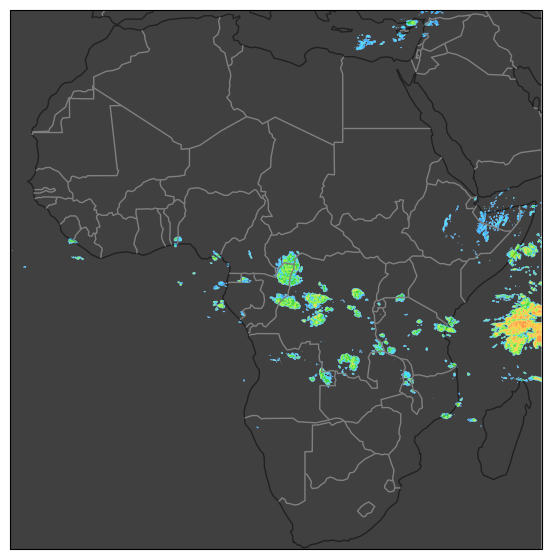

In [9]:
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import BoundaryNorm, ListedColormap

import cartopy.feature as cfeature
# Set the figure size, projection, and extent
fig = plt.figure(figsize=(21,7))
ax = plt.axes(projection=ccrs.PlateCarree())
crr_precip_temp=np.select(
    [crr_precip<0.2,crr_precip<1,crr_precip<2,crr_precip<3,crr_precip<5,crr_precip<7,crr_precip<10,crr_precip<15,crr_precip<20,crr_precip<30,crr_precip<50],
    [0,1,2,3,4,5,6,7,8,9,10],11)
cmap = ListedColormap(['black', '#1e1ed5','#0195ff', '#00d2fd', 
        '#448822', '#03c602', '#6eef02','#fefe01',
        '#fdbf02','#fd7d02','#ff5000','#ab1822'])

plt.contourf(x, y, crr_precip_temp,cmap=cmap,transform=ccrs.PlateCarree(), alpha=.75, antialiased=True)
ax.add_feature(cfeature.BORDERS, edgecolor='grey', facecolor="none", linewidth=1)
ax.add_feature(cfeature.LAND, edgecolor='grey', facecolor="none", linewidth=1)
plt.show()

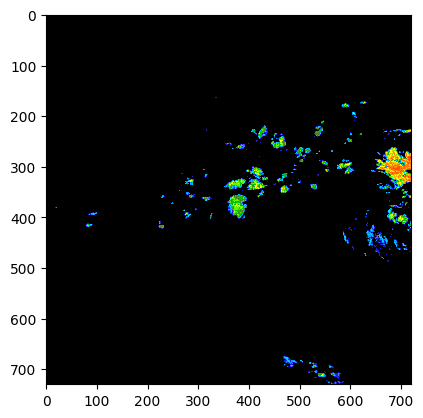

In [13]:
plt.imshow(crr_precip_temp,cmap=cmap)
ax.add_feature(cfeature.LAND, edgecolor='white', facecolor="none", linewidth=1)

### Checking the quality data

In [ ]:
dict_data_quality={}

In [ ]:
data_=glob('/content/drive/MyDrive/Dissertation - Nowcasting/Dissertation Project/Data/NWCSAF_Yifan/*.tar')


In [ ]:
import subprocess
import shutil
dict_={}
iter=0
for i in tqdm(data_):
  tarfile = i
  path = '/content/drive/MyDrive/Dissertation - Nowcasting/Dissertation Project/Data/Sample/testing_quality'
  retcode = subprocess.call(['tar', '-xvf', tarfile, '-C', path])
  name_folder=i.split('/')[-1].replace('.tar','')
  day_={}
  data_2=glob(path+'/'+name_folder+'/*.npy')
  for j in data_2:
    times=j.split('/')[-1].split('_')[-1].replace('.npy','')
    d_=np.ma.getdata(np.load(j,allow_pickle=True))
    min_=np.min(d_)
    max_=np.max(d_)
    median=np.median(d_)
    times_={}
    times_['min']=min_
    times_['max']=max_
    times_['median']=median
    day_[times]=times_
    open(j, 'w').close() 
  shutil.rmtree(path+'/'+name_folder)
  dict_[name_folder]=day_
  iter+=1
  if iter>100:
    break

  5%|▌         | 35/673 [07:09<2:10:36, 12.28s/it]


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd

In [ ]:
y_=pd.DataFrame(columns=['Date','Time','Min','Max','Median'])

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for i in dict_:
  for j in dict_[i]:
    t={'Date':[i],
       'Time':[j],
       'Min':[dict_[i][j]['min']],
       'Max':[dict_[i][j]['max']],
       'Median':[dict_[i][j]['median']]}
    t=pd.DataFrame.from_dict(t)
    y_=y_.append(t,ignore_index=True)

In [ ]:
y_.dropna().query('Min<0')

,Date,Time,Min,Max,Median
6,20190414,20190414T2315,-2.397039e+08,1.475853e+12,0.000000
10,20190427,20190427T0045,-1.527077e+118,1.209850e+252,0.000000
16,20190411,20190411T0300,-6.250136e+298,6.122772e+306,1.162850
21,20190411,20190411T0630,-1.229760e+01,1.072001e+09,3549.776861
28,20190411,20190411T0815,-1.312810e+01,2.469255e+07,0.611770
...,...,...,...,...,...
7915,20200104,20200104T2215,-6.368856e+307,5.394482e+306,0.000000
7916,20200104,20200104T2230,-9.766150e+00,7.926520e+296,0.000000
7918,20200104,20200104T2300,-1.995000e+01,2.685000e+01,0.000000
7919,20200104,20200104T2315,-1.995000e+01,2.756667e+01,0.000000


In [ ]:
y

NameError: ignored